In [26]:
# importação das bibliotecas

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [27]:
# definição das variáveis linguísticas de entrada e saída

# antecedentes (entradas) oq eu apresento ao sistema
# consequentes (saídas) a resposta do sistema

# EX. (0, 11, 1): 0 é o valor mínimo, 11 é o valor máximo e 1 é o passo 

comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida') #qualidade da comida
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico') #qualidade do serviço
preco = ctrl.Antecedent(np.arange(0, 11, 1), 'preco') #nivel do preço
avaliacao = ctrl.Consequent(np.arange(0, 26, 1), 'avaliacao') #valor da avaliacao

In [28]:
# definição do numero de conjuntos difusos para cada variável linguística

# trimf: triangular membership function
# universe: conjunto de valores que a variável linguística pode assumir

comida['horrivel'] = fuzz.trimf(comida.universe, [0, 0, 2]) #conjunto difuso horrivel
comida['ruim'] = fuzz.trimf(comida.universe, [1, 2, 4]) #conjunto difuso ruim
comida['aceitavel'] = fuzz.trimf(comida.universe, [2, 4, 6.5]) #conjunto difuso aceitavel
comida['boa'] = fuzz.trimf(comida.universe, [5, 7, 9]) #conjunto difuso boa
comida['otima'] = fuzz.trimf(comida.universe, [8, 9, 10]) #conjunto difuso otima

# no caso do serviço, a automf cria automaticamente os conjuntos difusos
#servico.automf(3)
# gera os conjuntos difusos: poor, average, good

servico['horroso'] = fuzz.trimf(servico.universe, [0, 0, 2]) #conjunto difuso horrivel
servico['ruim'] = fuzz.trimf(servico.universe, [1, 2, 4]) #conjunto difuso ruim
servico['aceitavel'] = fuzz.trimf(servico.universe, [2, 4, 6.5]) #conjunto difuso aceitavel
servico['bom'] = fuzz.trimf(servico.universe, [5, 7, 9]) #conjunto difuso boa
servico['otimo'] = fuzz.trimf(servico.universe, [8, 9, 10]) #conjunto difuso otima

preco['baixo'] = fuzz.trimf(preco.universe, [0, 0, 2]) #conjunto difuso baixo
preco['medio'] = fuzz.trimf(preco.universe, [1, 2, 4]) #conjunto difuso medio
preco['alto'] = fuzz.trimf(preco.universe, [2, 4, 6.5]) #conjunto difuso alto
preco['muito_alto'] = fuzz.trimf(preco.universe, [5, 7, 9]) #conjunto difuso muito_alto
preco['absurdo'] = fuzz.trimf(preco.universe, [8, 9, 10]) #conjunto difuso absurdo


c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


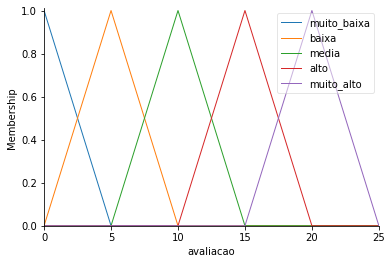

In [29]:
# parametriza os conjuntos difusos de saída
avaliacao['muito_baixa'] = fuzz.trimf(avaliacao.universe, [0, 0, 5]) #conjunto difuso muito_baixa
avaliacao['baixa'] = fuzz.trimf(avaliacao.universe, [0, 5, 10]) #conjunto difuso baixa
avaliacao['media'] = fuzz.trimf(avaliacao.universe, [5, 10, 15]) #conjunto difuso media
avaliacao['alto'] = fuzz.trimf(avaliacao.universe, [10, 15, 20]) #conjunto difuso alta
avaliacao['muito_alto'] = fuzz.trimf(avaliacao.universe, [15, 20, 25]) #conjunto difuso muito_alta

avaliacao.view()

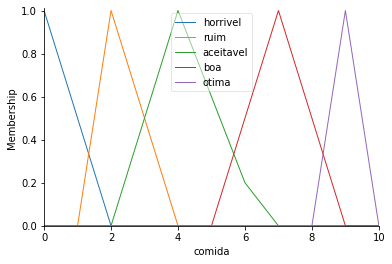

In [30]:
comida.view()

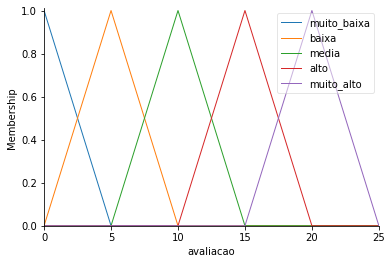

In [31]:
avaliacao.view()

In [32]:
# definindo as regras heurísticas para o sistema

"""r1 = ctrl.Rule(comida['ruim'] or servico['ruim'], avaliacao['baixa'])
r2 = ctrl.Rule(comida['otima'] or servico['otimo'], avaliacao['alta'])
r3 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'], avaliacao['media'])
r4 = ctrl.Rule(comida['ruim'] and servico['otimo'], avaliacao['media'])"""

r1 = ctrl.Rule(comida['horrivel'] and servico['horroso'] and preco['absurdo'], avaliacao['muito_baixa'])
r2 = ctrl.Rule(comida['horrivel'] and servico['horroso'] and preco['muito_alto'], avaliacao['muito_baixa'])
r3 = ctrl.Rule(comida['horrivel'] and servico['horroso'] and preco['alto'], avaliacao['muito_baixa'])
r4 = ctrl.Rule(comida['horrivel'] and servico['horroso'] and preco['medio'], avaliacao['muito_baixa'])
r5 = ctrl.Rule(comida['horrivel'] and servico['horroso'] and preco['baixo'], avaliacao['baixa'])

r6 = ctrl.Rule(comida['horrivel'] and servico['ruim'] and preco['absurdo'], avaliacao['muito_baixa'])
r7 = ctrl.Rule(comida['horrivel'] and servico['ruim'] and preco['muito_alto'], avaliacao['muito_baixa'])
r8 = ctrl.Rule(comida['horrivel'] and servico['ruim'] and preco['alto'], avaliacao['muito_baixa'])
r9 = ctrl.Rule(comida['horrivel'] and servico['ruim'] and preco['medio'], avaliacao['baixa'])
r10 = ctrl.Rule(comida['horrivel'] and servico['ruim'] and preco['baixo'], avaliacao['baixa'])

r11 = ctrl.Rule(comida['horrivel'] and servico['aceitavel'] and preco['absurdo'], avaliacao['muito_baixa'])
r12 = ctrl.Rule(comida['horrivel'] and servico['aceitavel'] and preco['muito_alto'], avaliacao['muito_baixa'])
r13 = ctrl.Rule(comida['horrivel'] and servico['aceitavel'] and preco['alto'], avaliacao['baixa'])
r14 = ctrl.Rule(comida['horrivel'] and servico['aceitavel'] and preco['medio'], avaliacao['baixa'])
r15 = ctrl.Rule(comida['horrivel'] and servico['aceitavel'] and preco['baixo'], avaliacao['media'])

r16 = ctrl.Rule(comida['horrivel'] and servico['bom'] and preco['absurdo'], avaliacao['muito_baixa'])
r17 = ctrl.Rule(comida['horrivel'] and servico['bom'] and preco['muito_alto'], avaliacao['baixa'])
r18 = ctrl.Rule(comida['horrivel'] and servico['bom'] and preco['alto'], avaliacao['baixa'])
r19 = ctrl.Rule(comida['horrivel'] and servico['bom'] and preco['medio'], avaliacao['media'])
r20 = ctrl.Rule(comida['horrivel'] and servico['bom'] and preco['baixo'], avaliacao['media'])

r21 = ctrl.Rule(comida['horrivel'] and servico['otimo'] and preco['absurdo'], avaliacao['muito_baixa'])
r22 = ctrl.Rule(comida['horrivel'] and servico['otimo'] and preco['muito_alto'], avaliacao['baixa'])
r23 = ctrl.Rule(comida['horrivel'] and servico['otimo'] and preco['alto'], avaliacao['media'])
r24 = ctrl.Rule(comida['horrivel'] and servico['otimo'] and preco['medio'], avaliacao['media'])
r25 = ctrl.Rule(comida['horrivel'] and servico['otimo'] and preco['baixo'], avaliacao['alto'])

r26 = ctrl.Rule(comida['ruim'] and servico['horroso'] and preco['absurdo'], avaliacao['muito_baixa'])
r27 = ctrl.Rule(comida['ruim'] and servico['horroso'] and preco['muito_alto'], avaliacao['muito_baixa'])
r28 = ctrl.Rule(comida['ruim'] and servico['horroso'] and preco['alto'], avaliacao['muito_baixa'])
r29 = ctrl.Rule(comida['ruim'] and servico['horroso'] and preco['medio'], avaliacao['muito_baixa'])
r30 = ctrl.Rule(comida['ruim'] and servico['horroso'] and preco['baixo'], avaliacao['baixa'])

r31 = ctrl.Rule(comida['ruim'] and servico['ruim'] and preco['absurdo'], avaliacao['muito_baixa'])
r32 = ctrl.Rule(comida['ruim'] and servico['ruim'] and preco['muito_alto'], avaliacao['muito_baixa']) 
r33 = ctrl.Rule(comida['ruim'] and servico['ruim'] and preco['alto'], avaliacao['muito_baixa'])
r34 = ctrl.Rule(comida['ruim'] and servico['ruim'] and preco['medio'], avaliacao['baixa'])
r35 = ctrl.Rule(comida['ruim'] and servico['ruim'] and preco['baixo'], avaliacao['baixa'])

r36 = ctrl.Rule(comida['ruim'] and servico['aceitavel'] and preco['absurdo'], avaliacao['muito_baixa'])
r37 = ctrl.Rule(comida['ruim'] and servico['aceitavel'] and preco['muito_alto'], avaliacao['muito_baixa'])
r38 = ctrl.Rule(comida['ruim'] and servico['aceitavel'] and preco['alto'], avaliacao['baixa'])
r39 = ctrl.Rule(comida['ruim'] and servico['aceitavel'] and preco['medio'], avaliacao['baixa'])
r40 = ctrl.Rule(comida['ruim'] and servico['aceitavel'] and preco['baixo'], avaliacao['baixa'])

r41 = ctrl.Rule(comida['ruim'] and servico['bom'] and preco['absurdo'], avaliacao['muito_baixa'])
r42 = ctrl.Rule(comida['ruim'] and servico['bom'] and preco['muito_alto'], avaliacao['baixa'])
r43 = ctrl.Rule(comida['ruim'] and servico['bom'] and preco['alto'], avaliacao['baixa'])
r44 = ctrl.Rule(comida['ruim'] and servico['bom'] and preco['medio'], avaliacao['media'])
r45 = ctrl.Rule(comida['ruim'] and servico['bom'] and preco['baixo'], avaliacao['media'])

r46 = ctrl.Rule(comida['ruim'] and servico['otimo'] and preco['absurdo'], avaliacao['baixa'])
r47 = ctrl.Rule(comida['ruim'] and servico['otimo'] and preco['muito_alto'], avaliacao['baixa'])
r48 = ctrl.Rule(comida['ruim'] and servico['otimo'] and preco['alto'], avaliacao['media'])
r49 = ctrl.Rule(comida['ruim'] and servico['otimo'] and preco['medio'], avaliacao['media'])
r50 = ctrl.Rule(comida['ruim'] and servico['otimo'] and preco['baixo'], avaliacao['alto'])

r51 = ctrl.Rule(comida['aceitavel'] and servico['horroso'] and preco['absurdo'], avaliacao['muito_baixa'])
r52 = ctrl.Rule(comida['aceitavel'] and servico['horroso'] and preco['muito_alto'], avaliacao['muito_baixa'])
r53 = ctrl.Rule(comida['aceitavel'] and servico['horroso'] and preco['alto'], avaliacao['muito_baixa'])
r54 = ctrl.Rule(comida['aceitavel'] and servico['horroso'] and preco['medio'], avaliacao['baixa'])
r55 = ctrl.Rule(comida['aceitavel'] and servico['horroso'] and preco['baixo'], avaliacao['baixa'])

r56 = ctrl.Rule(comida['aceitavel'] and servico['ruim'] and preco['absurdo'], avaliacao['muito_baixa'])
r57 = ctrl.Rule(comida['aceitavel'] and servico['ruim'] and preco['muito_alto'], avaliacao['muito_baixa'])
r58 = ctrl.Rule(comida['aceitavel'] and servico['ruim'] and preco['alto'], avaliacao['muito_baixa'])
r59 = ctrl.Rule(comida['aceitavel'] and servico['ruim'] and preco['medio'], avaliacao['baixa'])
r60 = ctrl.Rule(comida['aceitavel'] and servico['ruim'] and preco['baixo'], avaliacao['media'])

r61 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'] and preco['absurdo'], avaliacao['muito_baixa'])
r62 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'] and preco['muito_alto'], avaliacao['muito_baixa'])
r63 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'] and preco['alto'], avaliacao['baixa'])
r64 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'] and preco['medio'], avaliacao['media'])
r65 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'] and preco['baixo'], avaliacao['media'])

r66 = ctrl.Rule(comida['aceitavel'] and servico['bom'] and preco['absurdo'], avaliacao['muito_baixa'])
r67 = ctrl.Rule(comida['aceitavel'] and servico['bom'] and preco['muito_alto'], avaliacao['baixa'])
r68 = ctrl.Rule(comida['aceitavel'] and servico['bom'] and preco['alto'], avaliacao['media'])
r69 = ctrl.Rule(comida['aceitavel'] and servico['bom'] and preco['medio'], avaliacao['media'])
r70 = ctrl.Rule(comida['aceitavel'] and servico['bom'] and preco['baixo'], avaliacao['alto'])

r71 = ctrl.Rule(comida['aceitavel'] and servico['otimo'] and preco['absurdo'], avaliacao['muito_baixa'])
r72 = ctrl.Rule(comida['aceitavel'] and servico['otimo'] and preco['muito_alto'], avaliacao['baixa'])
r73 = ctrl.Rule(comida['aceitavel'] and servico['otimo'] and preco['alto'], avaliacao['media'])
r74 = ctrl.Rule(comida['aceitavel'] and servico['otimo'] and preco['medio'], avaliacao['alto'])
r75 = ctrl.Rule(comida['aceitavel'] and servico['otimo'] and preco['baixo'], avaliacao['alto'])

r76 = ctrl.Rule(comida['boa'] and servico['horroso'] and preco['absurdo'], avaliacao['muito_baixa'])
r77 = ctrl.Rule(comida['boa'] and servico['horroso'] and preco['muito_alto'], avaliacao['muito_baixa'])
r78 = ctrl.Rule(comida['boa'] and servico['horroso'] and preco['alto'], avaliacao['muito_baixa'])
r79 = ctrl.Rule(comida['boa'] and servico['horroso'] and preco['medio'], avaliacao['baixa'])    
r80 = ctrl.Rule(comida['boa'] and servico['horroso'] and preco['baixo'], avaliacao['media'])

r81 = ctrl.Rule(comida['boa'] and servico['ruim'] and preco['absurdo'], avaliacao['muito_baixa'])
r82 = ctrl.Rule(comida['boa'] and servico['ruim'] and preco['muito_alto'], avaliacao['muito_baixa'])
r83 = ctrl.Rule(comida['boa'] and servico['ruim'] and preco['alto'], avaliacao['muito_baixa'])
r84 = ctrl.Rule(comida['boa'] and servico['ruim'] and preco['medio'], avaliacao['baixa'])
r85 = ctrl.Rule(comida['boa'] and servico['ruim'] and preco['baixo'], avaliacao['media'])


r86 = ctrl.Rule(comida['boa'] and servico['aceitavel'] and preco['absurdo'], avaliacao['muito_baixa'])
r87 = ctrl.Rule(comida['boa'] and servico['aceitavel'] and preco['muito_alto'], avaliacao['baixa'])
r88 = ctrl.Rule(comida['boa'] and servico['aceitavel'] and preco['alto'], avaliacao['baixa'])
r89 = ctrl.Rule(comida['boa'] and servico['aceitavel'] and preco['medio'], avaliacao['media'])
r90 = ctrl.Rule(comida['boa'] and servico['aceitavel'] and preco['baixo'], avaliacao['alto'])

r91 = ctrl.Rule(comida['boa'] and servico['bom'] and preco['absurdo'], avaliacao['muito_baixa'])
r92 = ctrl.Rule(comida['boa'] and servico['bom'] and preco['muito_alto'], avaliacao['baixa'])
r93 = ctrl.Rule(comida['boa'] and servico['bom'] and preco['alto'], avaliacao['media'])
r94 = ctrl.Rule(comida['boa'] and servico['bom'] and preco['medio'], avaliacao['alto'])
r95 = ctrl.Rule(comida['boa'] and servico['bom'] and preco['baixo'], avaliacao['alto'])

r96 = ctrl.Rule(comida['boa'] and servico['otimo'] and preco['absurdo'], avaliacao['muito_baixa'])
r97 = ctrl.Rule(comida['boa'] and servico['otimo'] and preco['muito_alto'], avaliacao['baixa'])
r98 = ctrl.Rule(comida['boa'] and servico['otimo'] and preco['alto'], avaliacao['media'])
r99 = ctrl.Rule(comida['boa'] and servico['otimo'] and preco['medio'], avaliacao['alto'])
r100 = ctrl.Rule(comida['boa'] and servico['otimo'] and preco['baixo'], avaliacao['muito_alto'])

r101 = ctrl.Rule(comida['otima'] and servico['horroso'] and preco['absurdo'], avaliacao['muito_baixa'])
r102 = ctrl.Rule(comida['otima'] and servico['horroso'] and preco['muito_alto'], avaliacao['muito_baixa'])
r103 = ctrl.Rule(comida['otima'] and servico['horroso'] and preco['alto'], avaliacao['muito_baixa'])
r104 = ctrl.Rule(comida['otima'] and servico['horroso'] and preco['medio'], avaliacao['baixa'])
r105 = ctrl.Rule(comida['otima'] and servico['horroso'] and preco['baixo'], avaliacao['media'])

r106 = ctrl.Rule(comida['otima'] and servico['ruim'] and preco['absurdo'], avaliacao['muito_baixa'])
r107 = ctrl.Rule(comida['otima'] and servico['ruim'] and preco['muito_alto'], avaliacao['muito_baixa'])
r108 = ctrl.Rule(comida['otima'] and servico['ruim'] and preco['alto'], avaliacao['muito_baixa'])
r109 = ctrl.Rule(comida['otima'] and servico['ruim'] and preco['medio'], avaliacao['baixa'])
r110 = ctrl.Rule(comida['otima'] and servico['ruim'] and preco['baixo'], avaliacao['media'])

r111 = ctrl.Rule(comida['otima'] and servico['aceitavel'] and preco['absurdo'], avaliacao['muito_baixa'])
r112 = ctrl.Rule(comida['otima'] and servico['aceitavel'] and preco['muito_alto'], avaliacao['baixa'])
r113 = ctrl.Rule(comida['otima'] and servico['aceitavel'] and preco['alto'], avaliacao['baixa'])
r114 = ctrl.Rule(comida['otima'] and servico['aceitavel'] and preco['medio'], avaliacao['media'])
r115 = ctrl.Rule(comida['otima'] and servico['aceitavel'] and preco['baixo'], avaliacao['muito_alto'])

r116 = ctrl.Rule(comida['otima'] and servico['bom'] and preco['absurdo'], avaliacao['muito_baixa'])
r117 = ctrl.Rule(comida['otima'] and servico['bom'] and preco['muito_alto'], avaliacao['baixa'])
r118 = ctrl.Rule(comida['otima'] and servico['bom'] and preco['alto'], avaliacao['media'])
r119 = ctrl.Rule(comida['otima'] and servico['bom'] and preco['medio'], avaliacao['muito_alto'])
r120 = ctrl.Rule(comida['otima'] and servico['bom'] and preco['baixo'], avaliacao['muito_alto'])


r121 = ctrl.Rule(comida['otima'] and servico['otimo'] and preco['absurdo'], avaliacao['muito_baixa'])
r122 = ctrl.Rule(comida['otima'] and servico['otimo'] and preco['muito_alto'], avaliacao['baixa'])
r123 = ctrl.Rule(comida['otima'] and servico['otimo'] and preco['alto'], avaliacao['media'])
r124 = ctrl.Rule(comida['otima'] and servico['otimo'] and preco['medio'], avaliacao['muito_alto'])
r125 = ctrl.Rule(comida['otima'] and servico['otimo'] and preco['baixo'], avaliacao['muito_alto'])



In [33]:
# processo de inferência
# (1) fuzzyficação: transforma os valores de entrada em valores difusos
# (2) aplicação das regras: aplica as regras heurísticas com concordância u(x) > 0
# (3) agregação/composição: combina os resultados das regras
# (4) defuzzificação: transforma o resultado da agregação em um valor concreto

criterios = ctrl.ControlSystem([r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21, r22, r23, r24, r25, r26, r27, r28, r29, r30, r31, r32, r33, r34, r35, r36, r37, r38, r39, r40, r41, r42, r43, r44, r45, r46, r47, r48, r49, r50, r51, r52, r53, r54, r55, r56, r57, r58, r59, r60, r61, r62, r63, r64, r65, r66, r67, r68, r69, r70, r71, r72, r73, r74, r75, r76, r77, r78, r79, r80, r81, r82, r83, r84, r85, r86, r87, r88, r89, r90, r91, r92, r93, r94, r95, r96, r97, r98, r99, r100, r101, r102, r103, r104, r105, r106, r107, r108, r109, r110, r111, r112, r113, r114, r115, r116, r117, r118, r119, r120, r121, r122, r123, r124, r125])
resultado = ctrl.ControlSystemSimulation(criterios)
comida_ = int(input('Qualidade da comida: '))
servico_ = int(input('Qualidade do serviço: '))
preco_ = int(input('Preço: '))

#resultado.input['comida'] = comida_
#resultado.input['servico'] = servico_

resultado.input['preco'] = preco_

resultado.compute()

print('Valor da avaliacao: {}'.format(round(resultado.output['avaliacao'], 2)))

avaliacao.view(sim=resultado)

ValueError: invalid literal for int() with base 10: ''